In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('C:/Users/eilon_bd/תוכן מקצועי/Python Projects/heart_disease/heart_disease_after_prep.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,age_group
count,4233.000000,4233.000000,4233.000000,4233.00000,4233.000000,4233.000000,4233.000000,4233.000000,4233.000000,4233.000000,4233.000000,4233.000000,4233.000000,4233.000000,4233.000000,4233.000000,4233.000000
mean,0.429246,49.584928,1.979447,0.49374,9.072053,0.029294,0.005906,0.310418,0.024805,236.762002,132.325301,82.894047,25.801550,75.887078,81.860099,0.151429,2.509095
std,0.495027,8.572907,1.007206,0.50002,11.915513,0.168648,0.076632,0.462719,0.155549,44.364418,22.015185,11.909887,4.070491,12.024569,23.145859,0.358509,0.915357
min,0.000000,32.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000,1.000000
25%,0.000000,42.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000,2.000000
50%,0.000000,49.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000,2.000000
75%,1.000000,56.000000,3.000000,1.00000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,89.500000,28.030000,83.000000,87.000000,0.000000,3.000000
max,1.000000,70.000000,4.000000,1.00000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000,4.000000


In [5]:
df_scores=pd.DataFrame(columns=['presicsion','recall','f1-scores'])
df_scores

,presicsion,recall,f1-scores


# LOGISTIC REGRESSION

In [6]:
import sklearn.linear_model as sklin

In [7]:
model = sklin.LogisticRegression(solver='lbfgs', max_iter=1000)

In [8]:
X=df.drop(['TenYearCHD'],axis=1)
y=df['TenYearCHD']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [10]:
model.fit(X_train,y_train)

C:\Users\eilon_bd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(max_iter=1000)

In [11]:
pred = model.predict(X_test)

In [12]:
import sklearn.metrics as skmet

In [13]:
print(skmet.confusion_matrix(y_test,pred))

[[1189    9]
 [ 177   22]]


In [14]:
print(skmet.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93      1198
           1       0.71      0.11      0.19       199

    accuracy                           0.87      1397
   macro avg       0.79      0.55      0.56      1397
weighted avg       0.85      0.87      0.82      1397



In [15]:
df_scores.loc['Logistic Regression',:] = [skmet.precision_score(y_test,pred)\
                                          ,skmet.recall_score(y_test,pred)\
                                          ,skmet.f1_score(y_test,pred)]
df_scores

,presicsion,recall,f1-scores
Logistic Regression,0.709677,0.110553,0.191304


# Unbalanced Data

In [16]:
sum(df['TenYearCHD'])/len(df)

0.1514292463973541

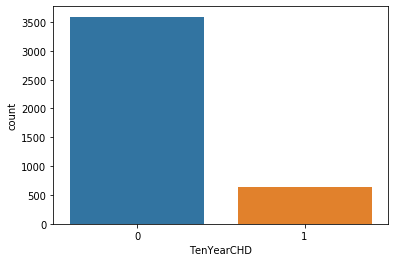

In [17]:
sns.countplot(df['TenYearCHD'])

In [18]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(k_neighbors=5)
X_smote, y_smote = smote.fit_sample(X_train, y_train)

In [19]:
model = sklin.LogisticRegression()
model.fit(X_smote,y_smote)

C:\Users\eilon_bd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [20]:
pred = model.predict(X_test)

In [21]:
print(skmet.confusion_matrix(y_test,pred))
print(skmet.classification_report(y_test,pred))

[[757 441]
 [ 75 124]]
              precision    recall  f1-score   support

           0       0.91      0.63      0.75      1198
           1       0.22      0.62      0.32       199

    accuracy                           0.63      1397
   macro avg       0.56      0.63      0.54      1397
weighted avg       0.81      0.63      0.69      1397



In [22]:
df_scores.loc['Logistic Regression with smote',:] = [skmet.precision_score(y_test,pred)\
                                          ,skmet.recall_score(y_test,pred)\
                                          ,skmet.f1_score(y_test,pred)]

# Ordinary Least Squares with Logistic Regression

In [23]:
import statsmodels.api as st

In [24]:
x_con = st.add_constant(X_smote)

In [25]:
res = st.OLS(y_smote,x_con).fit()

In [26]:
res.params

const             -0.717998
male              -0.087842
age                0.002863
education         -0.010002
currentSmoker     -0.246396
cigsPerDay         0.014120
BPMeds             0.194779
prevalentStroke   -0.140255
prevalentHyp      -0.140181
diabetes          -0.061070
totChol           -0.000075
sysBP              0.003281
diaBP              0.003192
BMI               -0.000522
heartRate          0.000256
glucose            0.001289
age_group          0.120785
dtype: float64

In [27]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             TenYearCHD   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     65.34
Date:                Fri, 09 Jul 2021   Prob (F-statistic):          2.96e-191
Time:                        11:46:43   Log-Likelihood:                -3000.8
No. Observations:                4788   AIC:                             6036.
Df Residuals:                    4771   BIC:                             6146.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.7180      0.114     -6.281      0.000      -0.942      -0.494
male               -0.0878      0.015     -5.865      0.000      -0.117      -0.058
age                 0.0029      0.003      1.072      0.284      -0.002       0.008
education          -0.0100      0.007     -1.375      0.169      -0.024       0.004
currentSmoker      -0.2464      0.022    -11.157      0.000      -0.290      -0.203
cigsPerDay          0.0141      0.001     15.588      0.000       0.012       0.016
BPMeds              0.1948      0.038      5.170      0.000       0.121       0.269
prevalentStroke    -0.1403      0.122     -1.152      0.249      -0.379       0.098
prevalentHyp       -0.1402      0.020     -7.043      0.000      -0.179      -0.101
diabetes           -0.0611      0.059     -1.040      0.298      -0.176       0.054
totChol         -7.472e-05      0.000     -0.494      0.621      -0.000       0.000
sysBP               0.0033      0.001      5.650      0.000       0.002       0.004
diaBP               0.0032      0.001      3.285      0.001       0.001       0.005
BMI                -0.0005      0.002     -0.290      0.772      -0.004       0.003
heartRate           0.0003      0.001      0.426      0.670      -0.001       0.001
glucose             0.0013      0.000      3.591      0.000       0.001       0.002
age_group           0.1208      0.025      4.916      0.000       0.073       0.169
==============================================================================
Omnibus:                    98352.150   Durbin-Watson:                   0.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              367.481
Skew:                          -0.040   Prob(JB):                     1.59e-80
Kurtosis:                       1.645   Cond. No.                     5.90e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
X_ols=df.drop(['TenYearCHD','age','education','prevalentStroke','diabetes','totChol','BMI','heartRate'],axis=1)
y_ols=df['TenYearCHD']

In [29]:
Xols_train, Xols_test, yols_train, yols_test = train_test_split(X_ols,y_ols, test_size=0.33, random_state=42)
X_smote_ols, y_smote_ols = smote.fit_sample(Xols_train, yols_train)

In [30]:
ols = sklin.LogisticRegression()
ols.fit(X_smote_ols,y_smote_ols)

C:\Users\eilon_bd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [31]:
ols_pred=ols.predict(Xols_test)

In [32]:
print(skmet.confusion_matrix(yols_test,ols_pred))
print(skmet.classification_report(yols_test,ols_pred))

[[796 402]
 [ 87 112]]
              precision    recall  f1-score   support

           0       0.90      0.66      0.77      1198
           1       0.22      0.56      0.31       199

    accuracy                           0.65      1397
   macro avg       0.56      0.61      0.54      1397
weighted avg       0.80      0.65      0.70      1397



In [33]:
df_scores.loc['Ordinary Least Squares with Logistic Regression',:] = [skmet.precision_score(yols_test,ols_pred)\
                                          ,skmet.recall_score(yols_test,ols_pred)\
                                          ,skmet.f1_score(yols_test,ols_pred)]

# RANDOM FOREST

In [34]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
rfc = RandomForestClassifier(n_estimators=100,min_samples_leaf=6)
rfc.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=6)

In [35]:
rfc_pred = rfc.predict(X_test)

In [36]:
print(skmet.confusion_matrix(y_test,rfc_pred))

[[1193    5]
 [ 190    9]]


In [37]:
print(skmet.classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1198
           1       0.64      0.05      0.08       199

    accuracy                           0.86      1397
   macro avg       0.75      0.52      0.50      1397
weighted avg       0.83      0.86      0.80      1397



In [38]:
df_scores.loc['Random Forest',:] = [skmet.precision_score(y_test,rfc_pred)\
                                          ,skmet.recall_score(y_test,rfc_pred)\
                                          ,skmet.f1_score(y_test,rfc_pred)]

Random Forest with Smoot

In [39]:
rfc_smoot= RandomForestClassifier(n_estimators=100,max_leaf_nodes=6)
rfc_smoot.fit(X_smote,y_smote)

RandomForestClassifier(max_leaf_nodes=6)

In [40]:
rfc_smoot_pred = rfc_smoot.predict(X_test)

In [41]:
print(skmet.confusion_matrix(y_test,rfc_smoot_pred))
print(skmet.classification_report(y_test,rfc_smoot_pred))

[[813 385]
 [ 73 126]]
              precision    recall  f1-score   support

           0       0.92      0.68      0.78      1198
           1       0.25      0.63      0.35       199

    accuracy                           0.67      1397
   macro avg       0.58      0.66      0.57      1397
weighted avg       0.82      0.67      0.72      1397



In [42]:
for i in np.arange(0.4,0.5,0.01):
    print(i, 'recall=\n',skmet.confusion_matrix(y_test,rfc_smoot.predict_proba(X_test)[:,1]>i)
          ,skmet.classification_report(y_test,rfc_smoot.predict_proba(X_test)[:,1]>i))
    df_scores.loc[f'Random Forest {i:.2f}',:] = [skmet.precision_score(y_test,rfc_smoot.predict_proba(X_test)[:,1]>i)\
                                          ,skmet.recall_score(y_test,rfc_smoot.predict_proba(X_test)[:,1]>i)\
                                          ,skmet.f1_score(y_test,rfc_smoot.predict_proba(X_test)[:,1]>i)]

0.4 recall=
 [[654 544]
 [ 48 151]]               precision    recall  f1-score   support

           0       0.93      0.55      0.69      1198
           1       0.22      0.76      0.34       199

    accuracy                           0.58      1397
   macro avg       0.57      0.65      0.51      1397
weighted avg       0.83      0.58      0.64      1397

0.41000000000000003 recall=
 [[663 535]
 [ 48 151]]               precision    recall  f1-score   support

           0       0.93      0.55      0.69      1198
           1       0.22      0.76      0.34       199

    accuracy                           0.58      1397
   macro avg       0.58      0.66      0.52      1397
weighted avg       0.83      0.58      0.64      1397

0.42000000000000004 recall=
 [[668 530]
 [ 48 151]]               precision    recall  f1-score   support

           0       0.93      0.56      0.70      1198
           1       0.22      0.76      0.34       199

    accuracy                           0.5

In [43]:
RF_scores=pd.DataFrame(columns=['precentage','presicsion','recall','f1-scores'])
for i in np.arange(0.3,0.6,0.005):
    RF_scores.loc[f'Random Forest {i:.3f}',:] = [i,skmet.precision_score(y_test,rfc_smoot.predict_proba(X_test)[:,1]>i)\
                                          ,skmet.recall_score(y_test,rfc_smoot.predict_proba(X_test)[:,1]>i)\
                                          ,skmet.f1_score(y_test,rfc_smoot.predict_proba(X_test)[:,1]>i)]

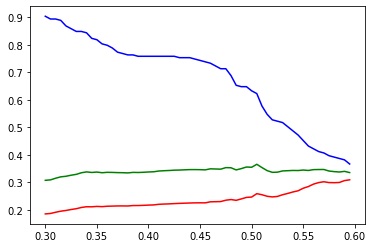

In [44]:
plt.plot(RF_scores['precentage'], RF_scores['presicsion'],'r',
         RF_scores['precentage'], RF_scores['recall'], 'b', 
         RF_scores['precentage'], RF_scores['f1-scores'], 'g')
plt.show()

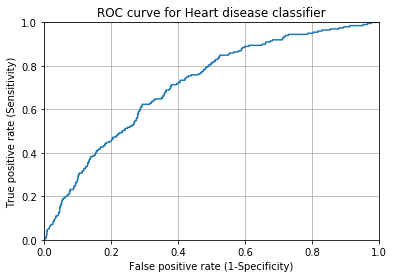

In [45]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, rfc_smoot.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [46]:
>>> from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

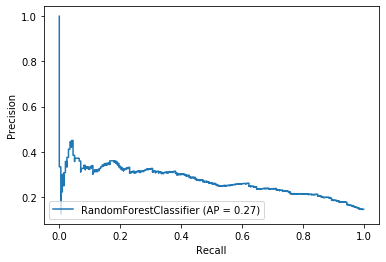

In [47]:
disp = plot_precision_recall_curve(rfc_smoot,X_test,y_test)

In [48]:
skmet.auc(fpr, tpr)

0.7132469526262363

Random Foerst with standart scalar

In [49]:
scaler = StandardScaler()

In [50]:
scaler.fit(df.drop('TenYearCHD',axis=1))

StandardScaler()

In [51]:
scaled_features = scaler.transform(df.drop('TenYearCHD',axis=1))

In [52]:
df_feat = pd.DataFrame(scaled_features,columns=df.drop('TenYearCHD',axis=1).columns)
df_feat.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,age_group
0,1.153111,-1.234841,2.006334,-0.987557,-0.761455,-0.173717,-0.077078,-0.670935,-0.159487,-0.941451,-1.195921,-1.082762,0.287088,0.342084,-0.210002,-1.648836
1,-0.867219,-1.234841,0.020408,1.012600,-0.006048,-0.173717,-0.077078,-0.670935,-0.159487,-0.242610,-0.832492,-1.586604,-0.848044,0.757948,0.370798,-1.648836
2,-0.867219,-1.351501,0.020408,1.012600,0.917228,-0.173717,-0.077078,1.490457,-0.159487,-0.355327,0.348651,0.596714,-1.093744,1.589677,-0.512467,-1.648836
3,-0.867219,-1.351501,0.020408,1.012600,-0.341784,-0.173717,-0.077078,-0.670935,-0.159487,-0.941451,-0.469064,0.134858,-0.629372,-0.073781,-0.166792,-1.648836
4,1.153111,-1.701482,0.020408,1.012600,0.917228,-0.173717,-0.077078,1.490457,-0.159487,-0.265154,-0.014778,0.680687,0.070872,-0.240127,0.049254,-1.648836


In [53]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(scaled_features,df['TenYearCHD'],
                                                    test_size=0.30,random_state=101)

In [54]:
rfc_s = RandomForestClassifier()
rfc_s.fit(X_train1,y_train1)

RandomForestClassifier()

In [55]:
y_pred = rfc_s.predict(X_test1)

In [56]:
print(skmet.confusion_matrix(y_test1,y_pred))

[[1067   17]
 [ 176   10]]


# Naive Bayes

In [57]:
import sklearn.naive_bayes as sknb

In [58]:
nb= sknb.GaussianNB()

In [59]:
nb.fit(X_smote,y_smote)

GaussianNB()

In [60]:
nb_pred = nb.predict(X_test)

In [61]:
print(skmet.confusion_matrix(y_test,nb_pred))
print(skmet.classification_report(y_test,nb_pred))

[[934 264]
 [108  91]]
              precision    recall  f1-score   support

           0       0.90      0.78      0.83      1198
           1       0.26      0.46      0.33       199

    accuracy                           0.73      1397
   macro avg       0.58      0.62      0.58      1397
weighted avg       0.81      0.73      0.76      1397



In [62]:
df_scores.loc['Naive Bayes',:] = [skmet.precision_score(y_test,nb_pred)\
                                          ,skmet.recall_score(y_test,nb_pred)\
                                          ,skmet.f1_score(y_test,nb_pred)]

# VOTING

In [63]:
emodel = VotingClassifier(estimators=[
    ('lr', LogisticRegression()),
    ('g', GaussianNB()),
    ('rf', RandomForestClassifier(n_estimators=100,min_samples_leaf=6)),
    ('knn', KNeighborsClassifier()),
    ('SVM', SVC(kernel='rbf', probability=True)),
    ],
    voting='soft')
emodel.fit(X_smote,y_smote)
emodel.score(X_test,y_test)

C:\Users\eilon_bd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7380100214745884

In [64]:
e_pred = emodel.predict(X_test)

In [65]:
print(skmet.confusion_matrix(y_test,e_pred))

[[933 265]
 [101  98]]


In [66]:
print(skmet.classification_report(y_test,e_pred))

              precision    recall  f1-score   support

           0       0.90      0.78      0.84      1198
           1       0.27      0.49      0.35       199

    accuracy                           0.74      1397
   macro avg       0.59      0.64      0.59      1397
weighted avg       0.81      0.74      0.77      1397



In [67]:
df_scores.loc['Voting',:] = [skmet.precision_score(y_test,e_pred)\
                                          ,skmet.recall_score(y_test,e_pred)\
                                          ,skmet.f1_score(y_test,e_pred)]

# Feature Importence with Random Forest

In [68]:
fe = pd.DataFrame(rfc_smoot.feature_importances_,index=df.drop('TenYearCHD',axis=1).columns\
                  ,columns=['feature'])
fe.sort_values(ascending=False,by='feature',inplace=True)
fe

,feature
age_group,0.453433
age,0.154493
sysBP,0.121380
education,0.115713
diaBP,0.053023
BPMeds,0.041984
cigsPerDay,0.027819
glucose,0.007110
currentSmoker,0.006605
heartRate,0.006513


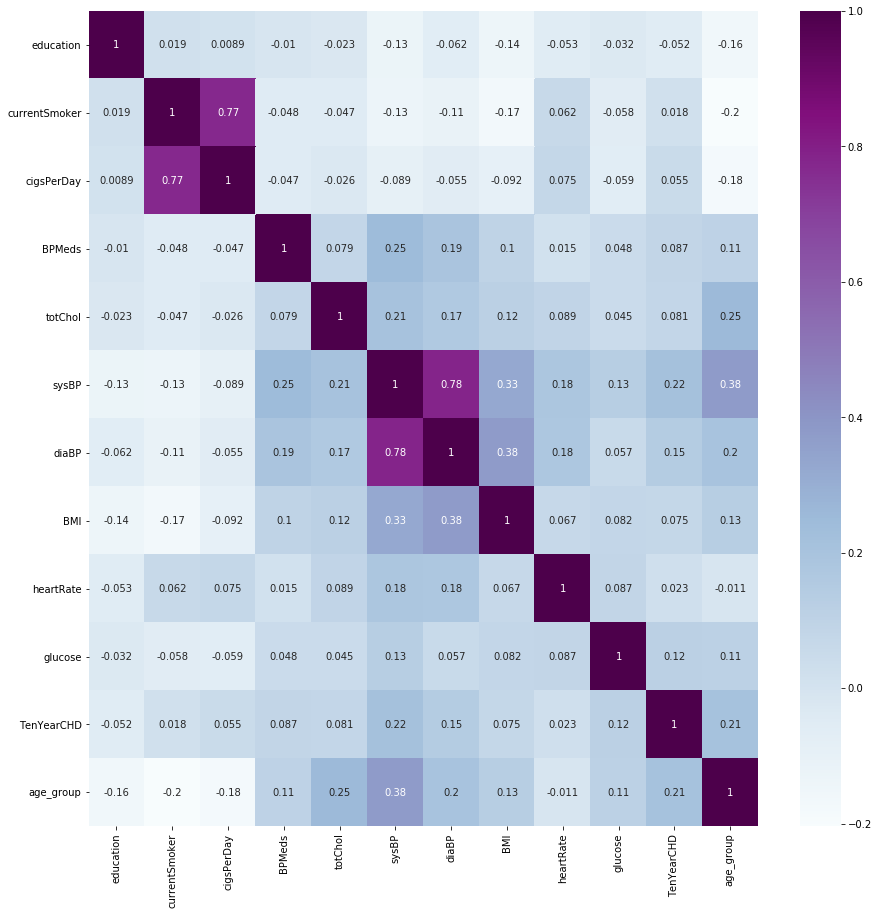

In [69]:
plt.figure(figsize = (15,15))
sns.heatmap(df.drop(['age','diabetes','prevalentStroke','male','prevalentHyp'],axis=1).corr(),cmap="BuPu",annot=True)

In [70]:
X_fe=df.drop(['TenYearCHD','age','diabetes','prevalentStroke','male','prevalentHyp'],axis=1)
y_fe=df['TenYearCHD']

In [71]:
X_train_fe, X_test_fe, y_train_fe, y_test_fe = train_test_split(X_fe,y_fe,
                                                    test_size=0.30,random_state=101)

In [72]:
X_smote_fe, y_smote_fe = smote.fit_sample(X_train_fe, y_train_fe)

In [73]:
rfc_fe= RandomForestClassifier(n_estimators=100,max_leaf_nodes=6)
rfc_fe.fit(X_smote_fe,y_smote_fe)

RandomForestClassifier(max_leaf_nodes=6)

In [74]:
rfc_fe_pred = rfc_fe.predict(X_test_fe)

In [75]:
print(skmet.confusion_matrix(y_test_fe,rfc_fe_pred))
print(skmet.classification_report(y_test_fe,rfc_fe_pred))

[[717 367]
 [ 70 116]]
              precision    recall  f1-score   support

           0       0.91      0.66      0.77      1084
           1       0.24      0.62      0.35       186

    accuracy                           0.66      1270
   macro avg       0.58      0.64      0.56      1270
weighted avg       0.81      0.66      0.70      1270



In [76]:
df_scores.loc['Feature Importence with Random Forest',:] = [skmet.precision_score(y_test_fe,rfc_fe_pred)\
                                          ,skmet.recall_score(y_test_fe,rfc_fe_pred)\
                                          ,skmet.f1_score(y_test_fe,rfc_fe_pred)]

# Ada Boost Classifier

In [77]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import tree

In [78]:
clf = AdaBoostClassifier(tree.DecisionTreeClassifier(random_state=0))
clf.fit(X_smote, y_smote)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=0))

In [79]:
clf_pred = clf.predict(X_test)

In [80]:
print(skmet.confusion_matrix(y_test,clf_pred))
print(skmet.classification_report(y_test,clf_pred))

[[989 209]
 [142  57]]
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1198
           1       0.21      0.29      0.25       199

    accuracy                           0.75      1397
   macro avg       0.54      0.56      0.55      1397
weighted avg       0.78      0.75      0.76      1397



In [81]:
df_scores.loc['Ada Boost Classifier',:] = [skmet.precision_score(y_test,clf_pred)\
                                          ,skmet.recall_score(y_test,clf_pred)\
                                          ,skmet.f1_score(y_test,clf_pred)]

In [82]:
df_scores

,presicsion,recall,f1-scores
Logistic Regression,0.709677,0.110553,0.191304
Logistic Regression with smote,0.219469,0.623116,0.324607
Ordinary Least Squares with Logistic Regression,0.217899,0.562814,0.314165
Random Forest,0.642857,0.0452261,0.084507
Random Forest 0.40,0.217266,0.758794,0.337808
Random Forest 0.41,0.220117,0.758794,0.341243
Random Forest 0.42,0.221733,0.758794,0.343182
Random Forest 0.43,0.223547,0.753769,0.344828
Random Forest 0.44,0.224888,0.753769,0.34642
Random Forest 0.45,0.22561,0.743719,0.346199
